# Traditional Cake Detection - YOLOv7 Transfer Learning Model

## Extract Data from Roboflow

In [44]:
%cd data-v4
!curl -L "https://app.roboflow.com/ds/PAzcyeeZqz?key=4UqcUfk8P5" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip Data

/home/isb/Felicia 20/data-v4
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   1680      0 --:--:-- --:--:-- --:--:--  1682
100 86.3M  100 86.3M    0     0  4989k      0  0:00:17  0:00:17 --:--:-- 5153k0:07 6198k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/cenil19_png.rf.6ee77096ba805174f044d18bf036a372.jpg  
 extracting: test/images/cenil20_jpg.rf.5184b1343eba5f59f6949ea46166f252.jpg  
 extracting: test/images/cenil2_jpg.rf.70b8c20e22e38d99cee023b442f0531d.jpg  
 extracting: test/images/cenil42_jpg.rf.a62daf53cc87991c592571e6ff1d4cdc.jpg  
 extracting: test/images/cenil44_jpg.rf.d78dfc53e2a2fe5aabeb4e94087ebf48.jpg  
 extracting: test/images/cenil47_webp.rf.caa173fcdc7a4d58a2417ac84e34

## Exploratory Data Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
# Define dataset directory
dataset_dir = "/home/isb/Felicia 20/data-v2"

# List all classes
classes = ['cenil', 'cucur', 'dadargulung', 'getuklindri', 'lumpur', 'putrisalju', 'serabi', 'wajik']

# Load file paths and labels
train_label_paths = [os.path.join(dataset_dir, "train", "labels", file) for file in os.listdir(os.path.join(dataset_dir, "train", "labels")) if os.path.isfile(os.path.join(dataset_dir, "train", "labels", file)) and file.endswith('.txt')]
test_label_paths = [os.path.join(dataset_dir, "test", "labels", file) for file in os.listdir(os.path.join(dataset_dir, "test", "labels")) if os.path.isfile(os.path.join(dataset_dir, "test", "labels", file)) and file.endswith('.txt')]
validation_label_paths = [os.path.join(dataset_dir, "valid", "labels", file) for file in os.listdir(os.path.join(dataset_dir, "valid", "labels")) if os.path.isfile(os.path.join(dataset_dir, "valid", "labels", file)) and file.endswith('.txt')]

train_image_paths = [os.path.join(dataset_dir, "train", "images", file) for file in os.listdir(os.path.join(dataset_dir, "train", "images"))]
test_image_paths = [os.path.join(dataset_dir, "test", "images", file) for file in os.listdir(os.path.join(dataset_dir, "test", "images"))]
validation_image_paths = [os.path.join(dataset_dir, "valid", "images", file) for file in os.listdir(os.path.join(dataset_dir, "valid", "images"))]

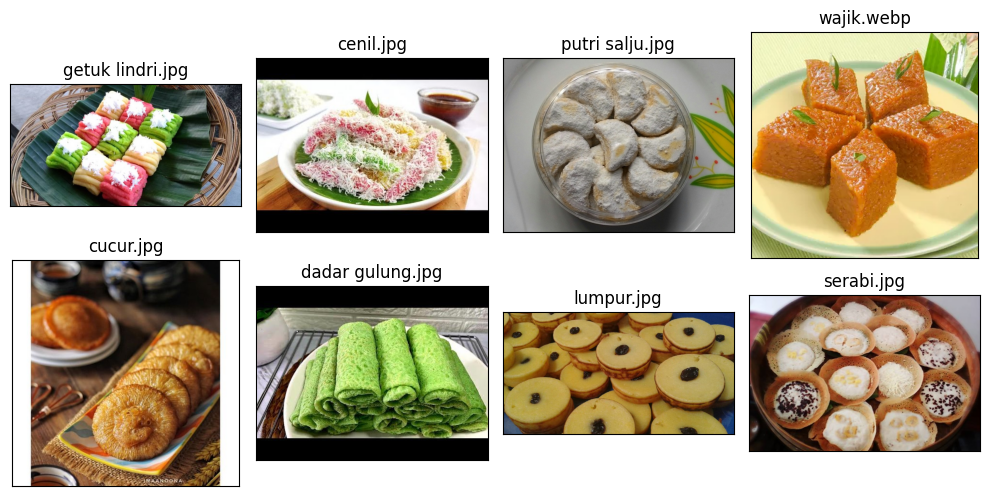

In [3]:
import webp

folder_dir = "/home/isb/Felicia 20/data-v2/sample"

fig = plt.figure(figsize=(10, 5)) 
fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the spacing between subplots

i = 0
for images in os.listdir(folder_dir):
    if images.endswith((".png", ".jpg", ".jpeg", ".webp")):
        i += 1
        ax = fig.add_subplot(2, 4, i, aspect='equal')
        ax.set_xticks([])
        ax.set_yticks([])
        
        if images.endswith((".png", ".jpg", ".jpeg")):
            img = plt.imread(os.path.join(folder_dir, images))
        elif images.endswith(".webp"):
            img = webp.load_image(os.path.join(folder_dir, images), 'RGBA')

        ax.imshow(img)
        ax.set_title(images)

plt.tight_layout()
plt.show()

In [4]:
n_images = len([f for f in os.listdir(os.path.join(dataset_dir, "train", "images")) if not f.startswith('.')])

n_labels = 0
for label_file in train_label_paths:
    try:
        with open(label_file, "r") as file:
            lines = file.readlines()

            for line in lines:
                class_index = int(line.split()[0])-1
                class_name = classes[class_index]
            
                if class_index < len(classes): 
                    n_labels += 1
    except IsADirectoryError:
        pass

print("Dataset Name: Indonesian Traditional Cake\n")
print("Number of images: ", n_images)
print("Number of labels (bounding boxes): ", n_labels)
print("Number of classes: ", len(classes))

Dataset Name: Indonesian Traditional Cake

Number of images:  1680
Number of labels (bounding boxes):  6787
Number of classes:  8


{'cenil': 210, 'cucur': 210, 'dadargulung': 210, 'getuklindri': 210, 'lumpur': 210, 'putrisalju': 210, 'serabi': 210, 'wajik': 210}


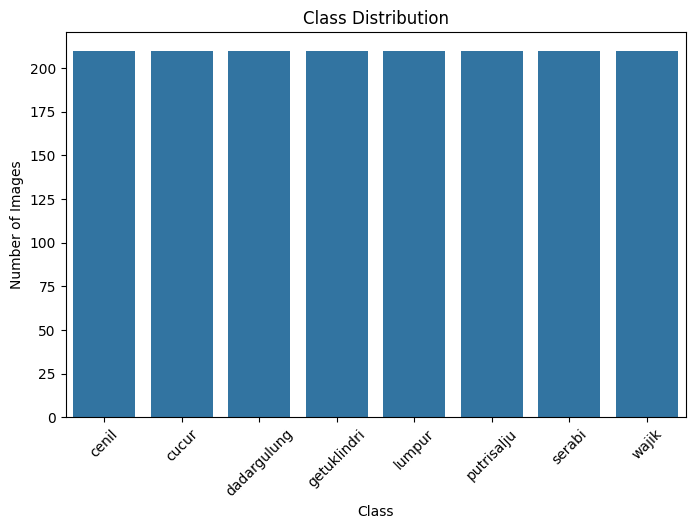

In [5]:
# Count images per class in the training set
class_counts = {}
for class_name in classes:
    class_counts[class_name] = len([label_path for label_path in train_label_paths if class_name in label_path])

print(class_counts)

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

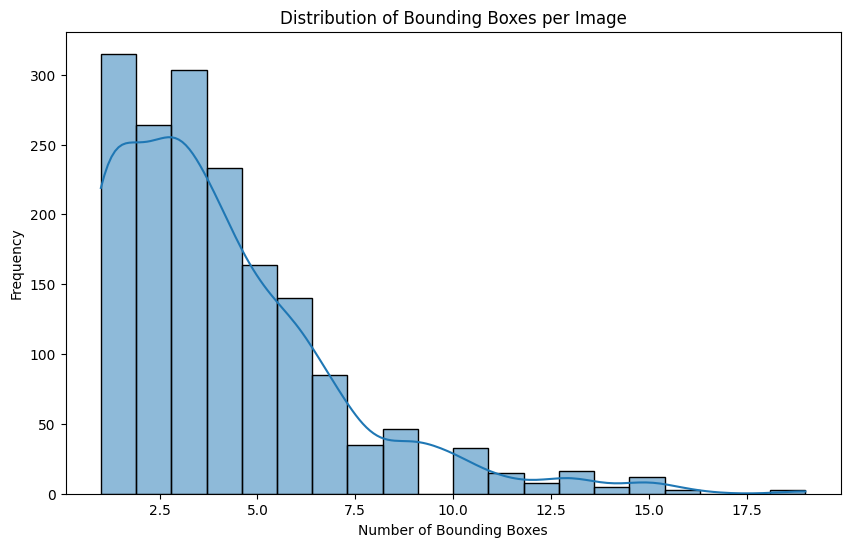

In [6]:
# Function to count bounding boxes in a label file
def count_bounding_boxes(label_path):
    try:
        with open(label_path, "r") as file:
            lines = file.readlines()
        return len(lines)
    except IsADirectoryError:
        return 0

# Count bounding boxes for each label file
bounding_box_counts = {}
for label_path in train_label_paths:
    bounding_box_counts[label_path] = count_bounding_boxes(label_path)

# Plot bounding box counts
plt.figure(figsize=(10, 6))
sns.histplot(list(bounding_box_counts.values()), bins=20, kde=True)
plt.title("Distribution of Bounding Boxes per Image")
plt.xlabel("Number of Bounding Boxes")
plt.ylabel("Frequency")
plt.show()

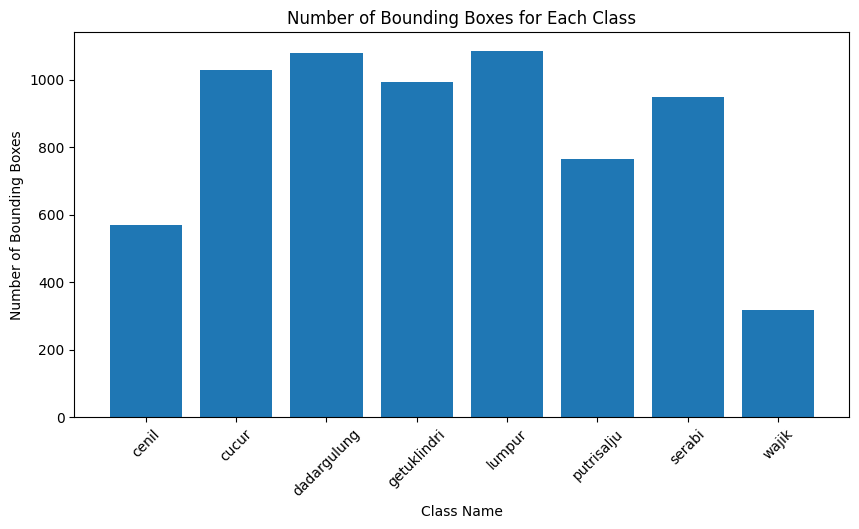

In [7]:
# Initialize dictionary to store total bounding box counts for each class
bbox_counts = {class_name: 0 for class_name in classes}
# Count bounding boxes for all classes in each label file
for label_file in train_label_paths:
    try:
        with open(label_file, "r") as file:
            lines = file.readlines()

            for line in lines:
                class_index = int(line.split()[0])-1
                class_name = classes[class_index]
            
                if class_index < len(classes):  # Check if the class index is within range
                    bbox_counts[class_name] += 1
                
    except IsADirectoryError:
        pass

#Plot bounding box counts for every class
plt.figure(figsize=(10, 5))
plt.bar(bbox_counts.keys(), bbox_counts.values())
plt.title("Number of Bounding Boxes for Each Class")
plt.xlabel("Class Name")
plt.ylabel("Number of Bounding Boxes")
plt.xticks(rotation=45)
plt.show()

## Clone YOLOv7 repository

In [9]:
!git clone https://github.com/WongKinYiu/yolov7.git # clone repo

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 6.00 MiB/s, done.
Resolving deltas: 100% (519/519), done.


## Install YOLOv7 dependencies

In [10]:
!pip install -r yolov7/requirements.txt

## Import dependencies and check GPU availability

In [11]:
import torch
import os
import torchvision

In [52]:
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.2.2+cu121 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', major=8, minor=6, total_memory=12036MB, multi_processor_count=28)


## Define the number of classes and YOLOv7 model architecture

In [10]:
import yaml

%cd data-v2
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(num_classes)

/home/isb/Felicia 20/data-v2
8


In [54]:
%cd ..
%cat yolov7/cfg/training/yolov7.yaml

/home/isb/Felicia 20
# parameters
nc: 80  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# yolov7 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0
  
   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2      
   [-1, 1, Conv, [64, 3, 1]],
   
   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4  
   [-1, 1, Conv, [64, 1, 1]],
   [-2, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],  # 11
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 16-P3/8  
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1

## Run YOLOv7 training on Traditional Cake Dataset

In [ ]:
#lr 0.01 freeze 0
%time
!python yolov7/train.py --workers 8 --device 0 --batch-size 8  --data 'data-v2/data.yaml' --img 640 640 --cfg 'yolov7/cfg/training/yolov7.yaml' --weights 'yolov7/yolov7_training.pt' --name yolov7-traditional-cake --hyp 'yolov7/data/hyp.scratch.custom.yaml' --epochs 150

#RESULT : runs/train/yolov7-traditional-cake21

In [7]:
#lr 0.01 freeze 50
%time
!python yolov7/train.py --workers 8 --device 0 --batch-size 8 --freeze 50 --data 'data-v2/data.yaml' --img 640 640 --cfg 'yolov7/cfg/training/yolov7.yaml' --weights 'yolov7/yolov7_training.pt' --name yolov7-traditional-cake --hyp 'yolov7/data/hyp.scratch.custom.yaml' --epochs 70

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs
2024-05-19 16:29:33.316958: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 16:29:33.868917: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)

Namespace(weights='yolov7/yolov7_training.pt', cfg='yolov7/cfg/training/yolov7.yaml', data='data-v2/data.yaml', hyp='yolov7/data/hyp.scratch.custom.yaml', epochs=70, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, l

In [9]:
#lr 0.01 freeze 42
%time
!python yolov7/train.py --workers 8 --device 0 --batch-size 8 --freeze 42 --data 'data-v2/data.yaml' --img 640 640 --cfg 'yolov7/cfg/training/yolov7.yaml' --weights 'yolov7/yolov7_training.pt' --name yolov7-traditional-cake --hyp 'yolov7/data/hyp.scratch.custom.yaml' --epochs 70

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs
2024-05-19 19:59:11.725269: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 19:59:12.286991: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)

Namespace(weights='yolov7/yolov7_training.pt', cfg='yolov7/cfg/training/yolov7.yaml', data='data-v2/data.yaml', hyp='yolov7/data/hyp.scratch.custom.yaml', epochs=70, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, l

In [46]:
#lr 0.001 freeze 42
%time
!python yolov7/train.py --workers 8 --device 0 --batch-size 8 --freeze 42 --data 'data-v2/data.yaml' --img 640 640 --cfg 'yolov7/cfg/training/yolov7.yaml' --weights 'yolov7/yolov7_training.pt' --name yolov7-traditional-cake --hyp 'yolov7/data/hyp2.scratch.custom.yaml' --epochs 70

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
2024-05-30 09:27:37.070079: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 09:27:37.647446: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)

Namespace(weights='yolov7/yolov7_training.pt', cfg='yolov7/cfg/training/yolov7.yaml', data='data-v2/data.yaml', hyp='yolov7/data/hyp2.scratch.custom.yaml', epochs=70, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, 

In [51]:
#lr 0.0001 freeze 42 epoch 150
%time
!python yolov7/train.py --workers 8 --device 0 --batch-size 8 --freeze 42 --data 'data-v2/data.yaml' --img 640 640 --cfg 'yolov7/cfg/training/yolov7.yaml' --weights 'yolov7/yolov7_training.pt' --name yolov7-traditional-cake --hyp 'yolov7/data/hyp2.scratch.custom.yaml' --epochs 150

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
2024-05-30 11:31:57.810591: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 11:31:58.385533: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)

Namespace(weights='yolov7/yolov7_training.pt', cfg='yolov7/cfg/training/yolov7.yaml', data='data-v2/data.yaml', hyp='yolov7/data/hyp2.scratch.custom.yaml', epochs=150, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False,

In [55]:
#lr 0.0001 freeze 42 epoch 300
%time
!python yolov7/train.py --workers 8 --device 0 --batch-size 8 --freeze 42 --data 'data-v2/data.yaml' --img 640 640 --cfg 'yolov7/cfg/training/yolov7.yaml' --weights 'yolov7/yolov7_training.pt' --name yolov7-traditional-cake --hyp 'yolov7/data/hyp2.scratch.custom.yaml' --epochs 300

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
2024-05-30 13:30:41.502457: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 13:30:42.076882: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)

Namespace(weights='yolov7/yolov7_training.pt', cfg='yolov7/cfg/training/yolov7.yaml', data='data-v2/data.yaml', hyp='yolov7/data/hyp2.scratch.custom.yaml', epochs=300, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False,

## Display results of YOLOv7 training on Traditional Cake dataset

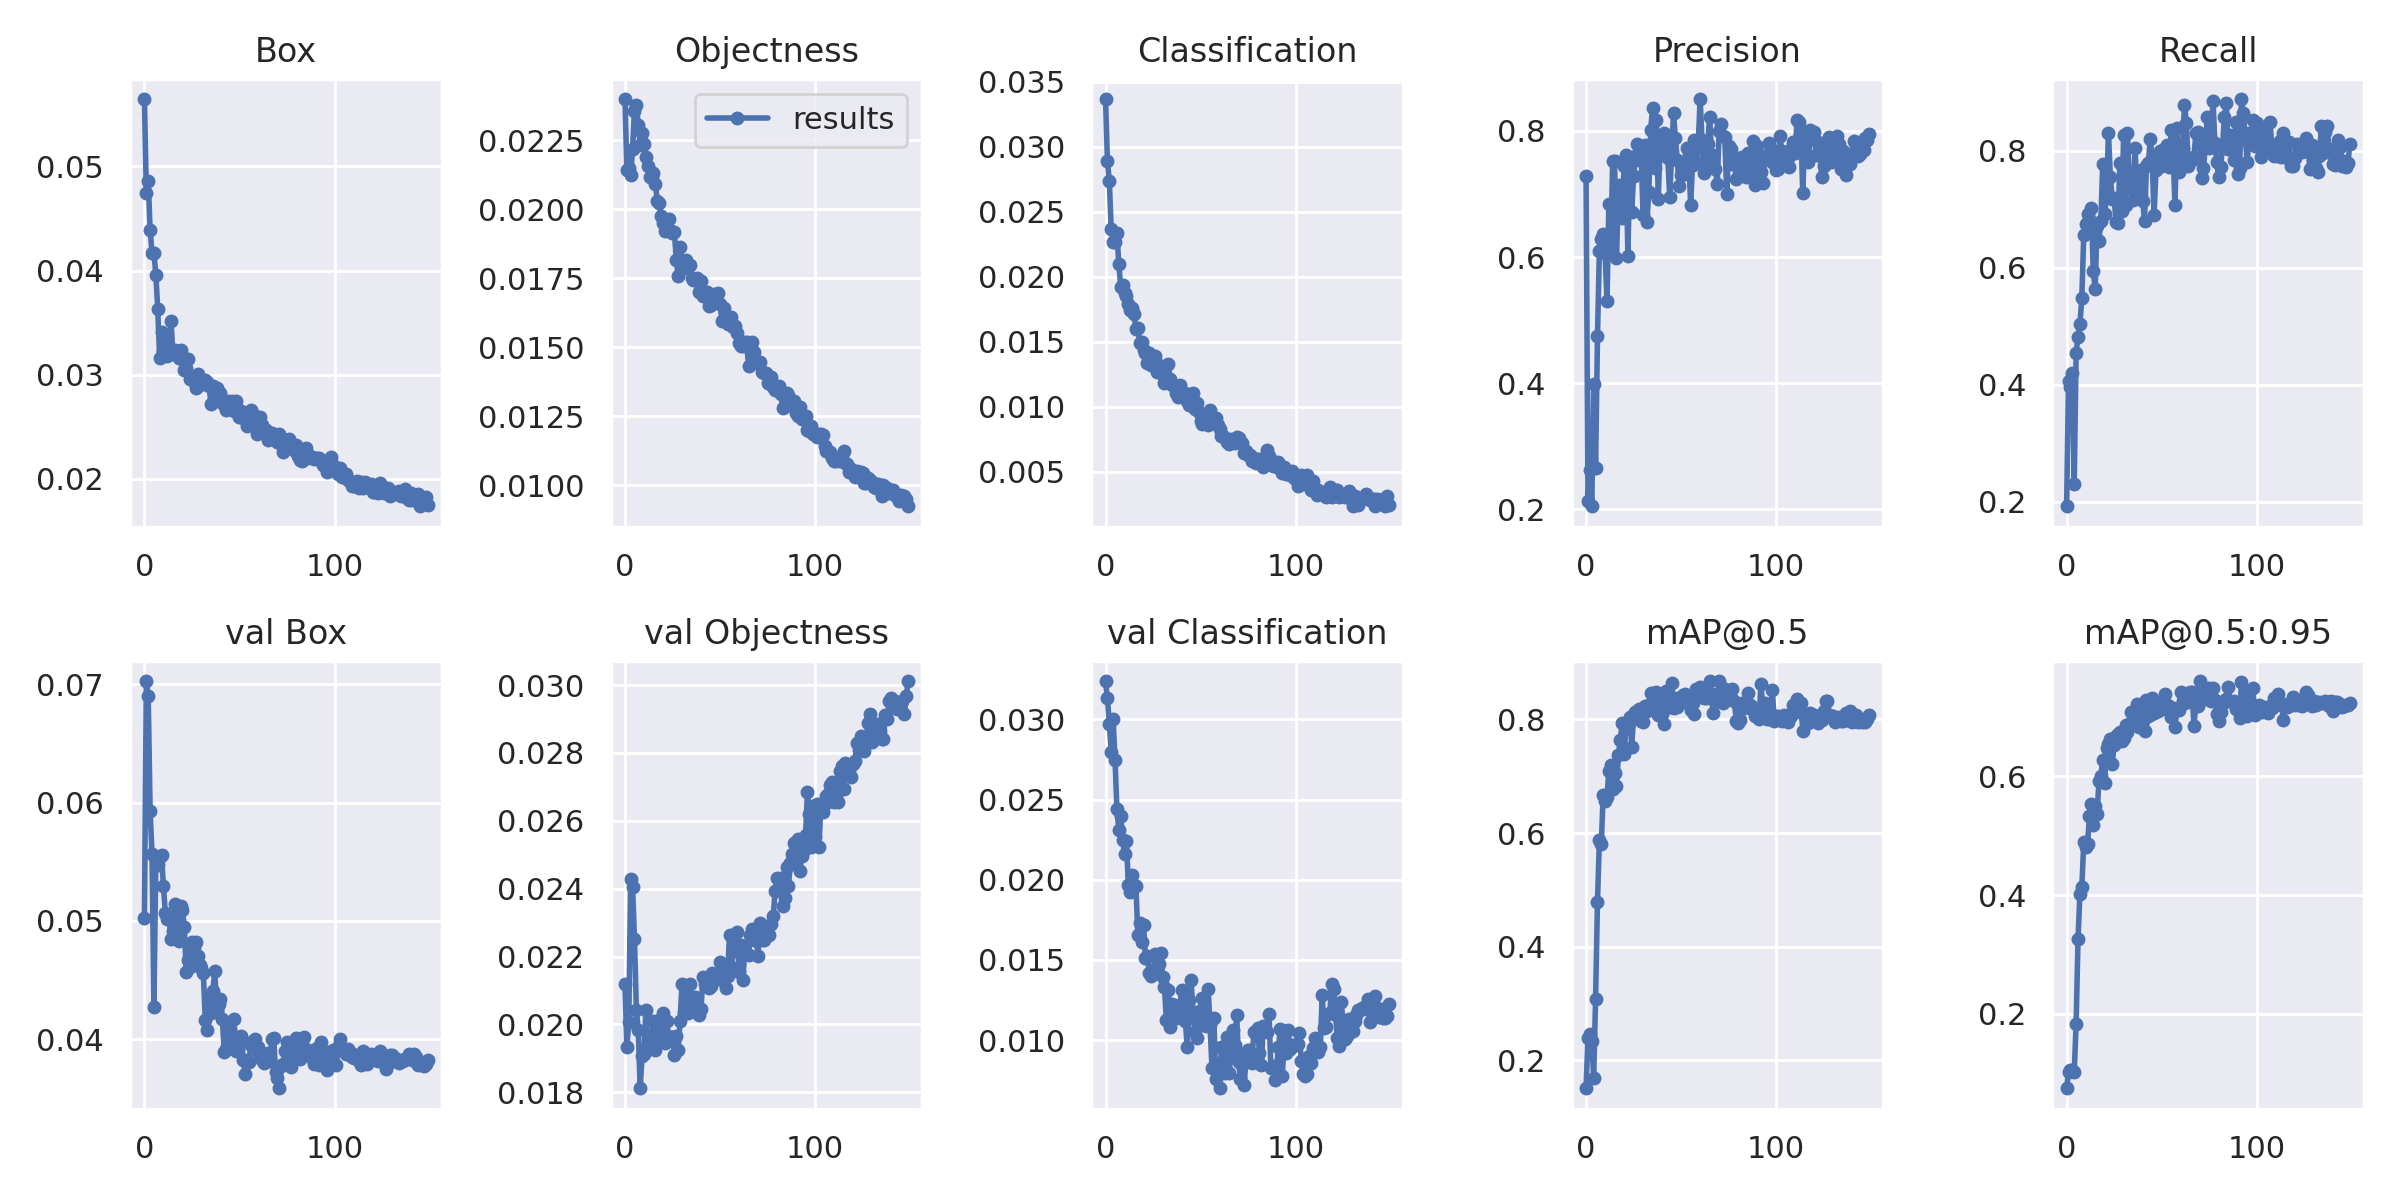

In [24]:
#lr 0.01 freeze 0
from IPython.display import Image, clear_output
Image(filename='runs/train/yolov7-traditional-cake21-v4-ok/results.png', width=1000)  # view results

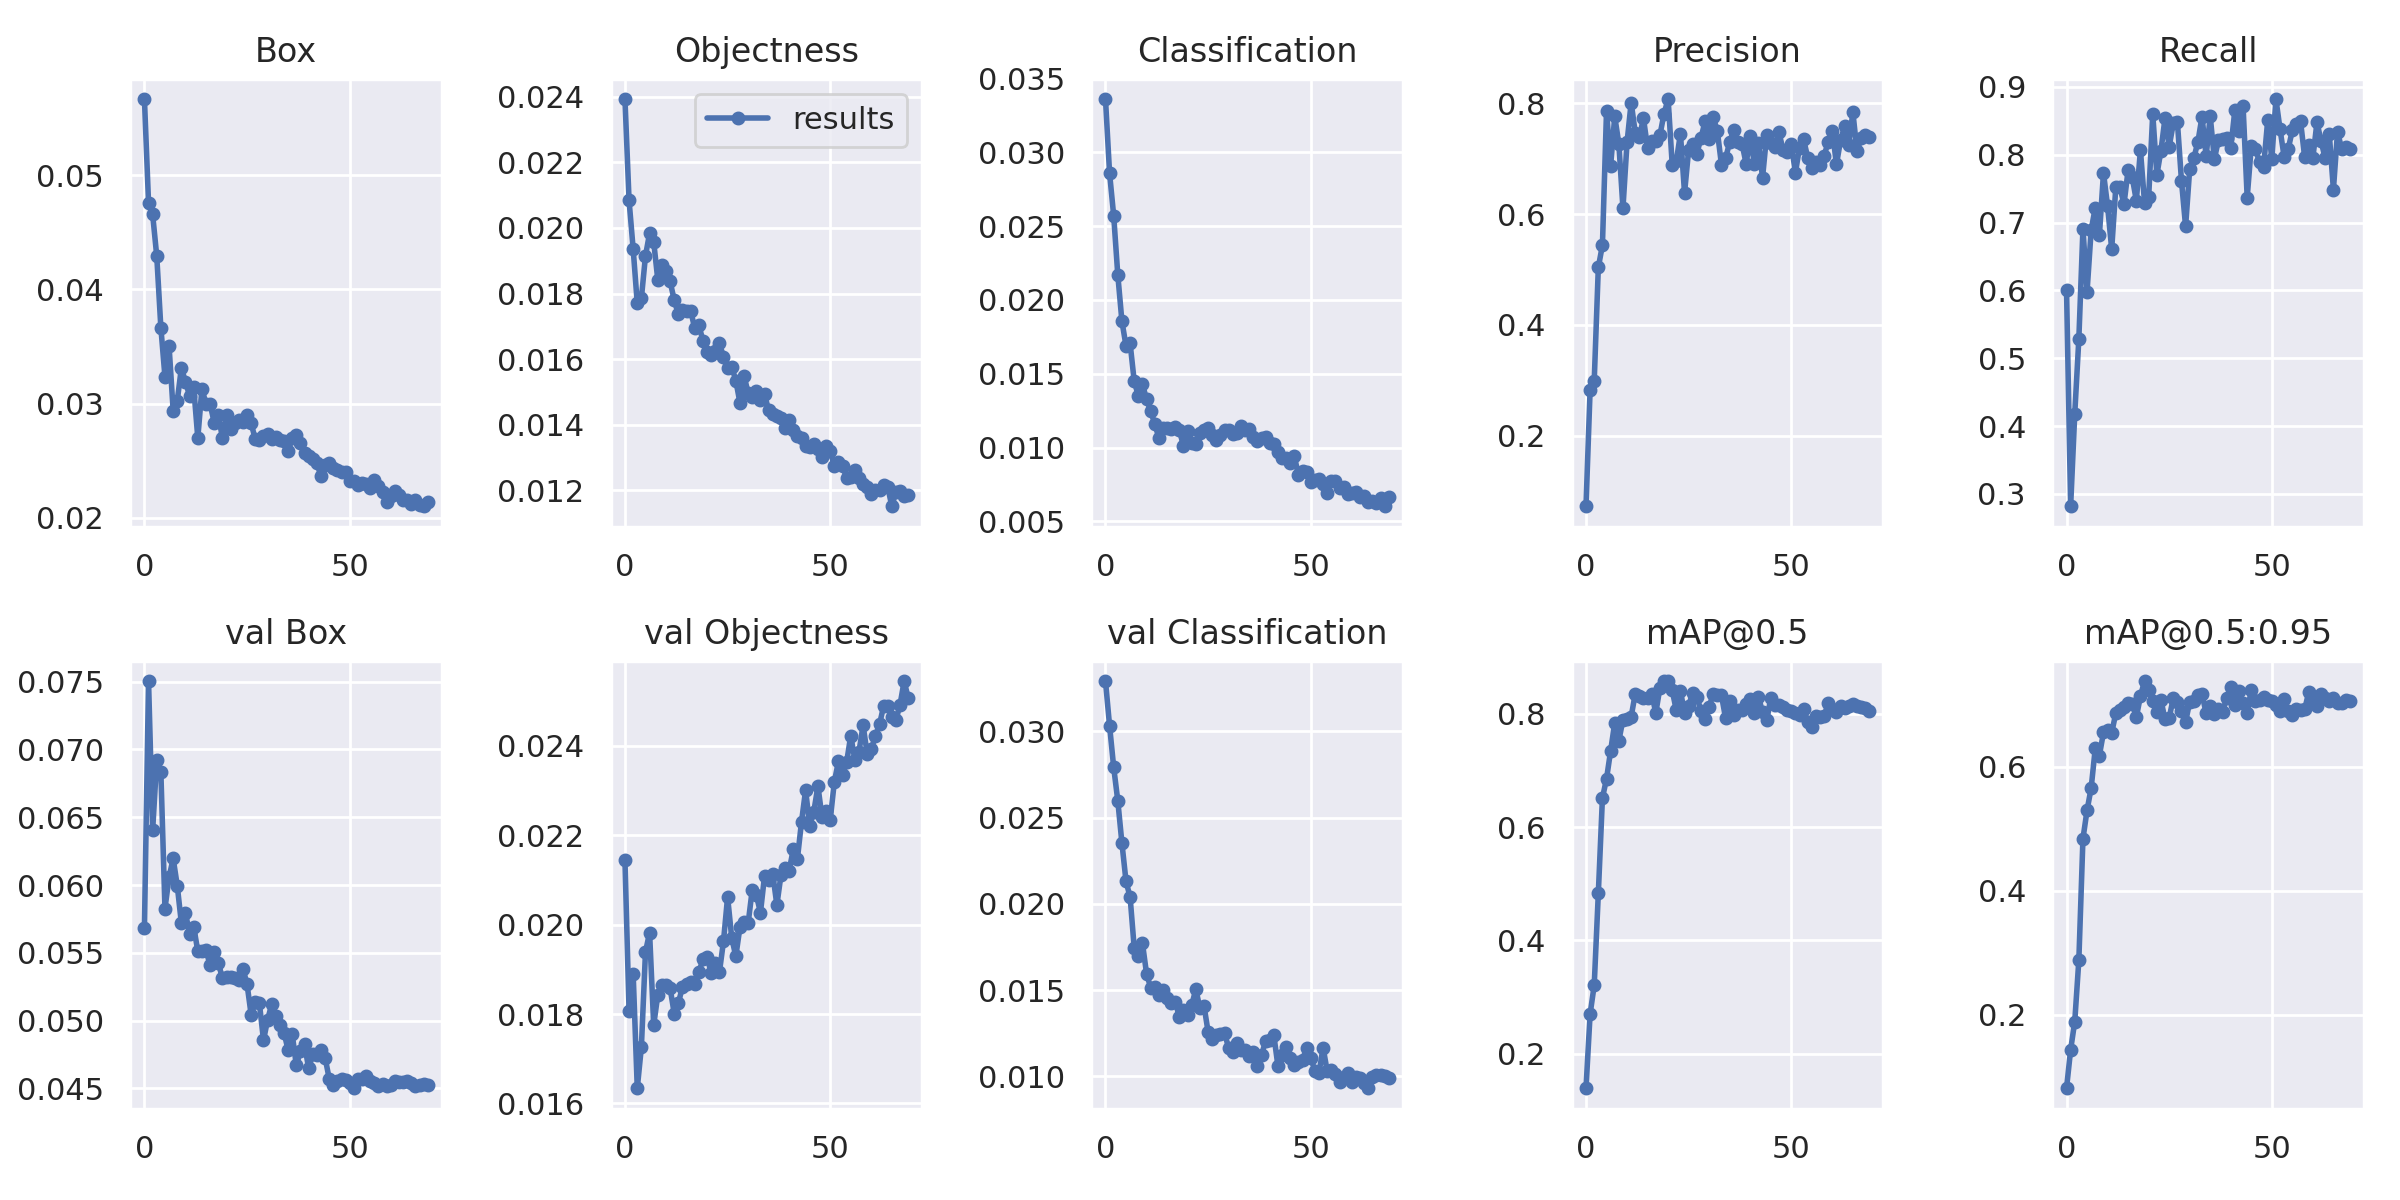

In [16]:
#lr 0.01 freeze 50
from IPython.display import Image, clear_output
Image(filename='runs/train/yolov7-traditional-cake29-v5-okk/results.png', width=1000)  # view results

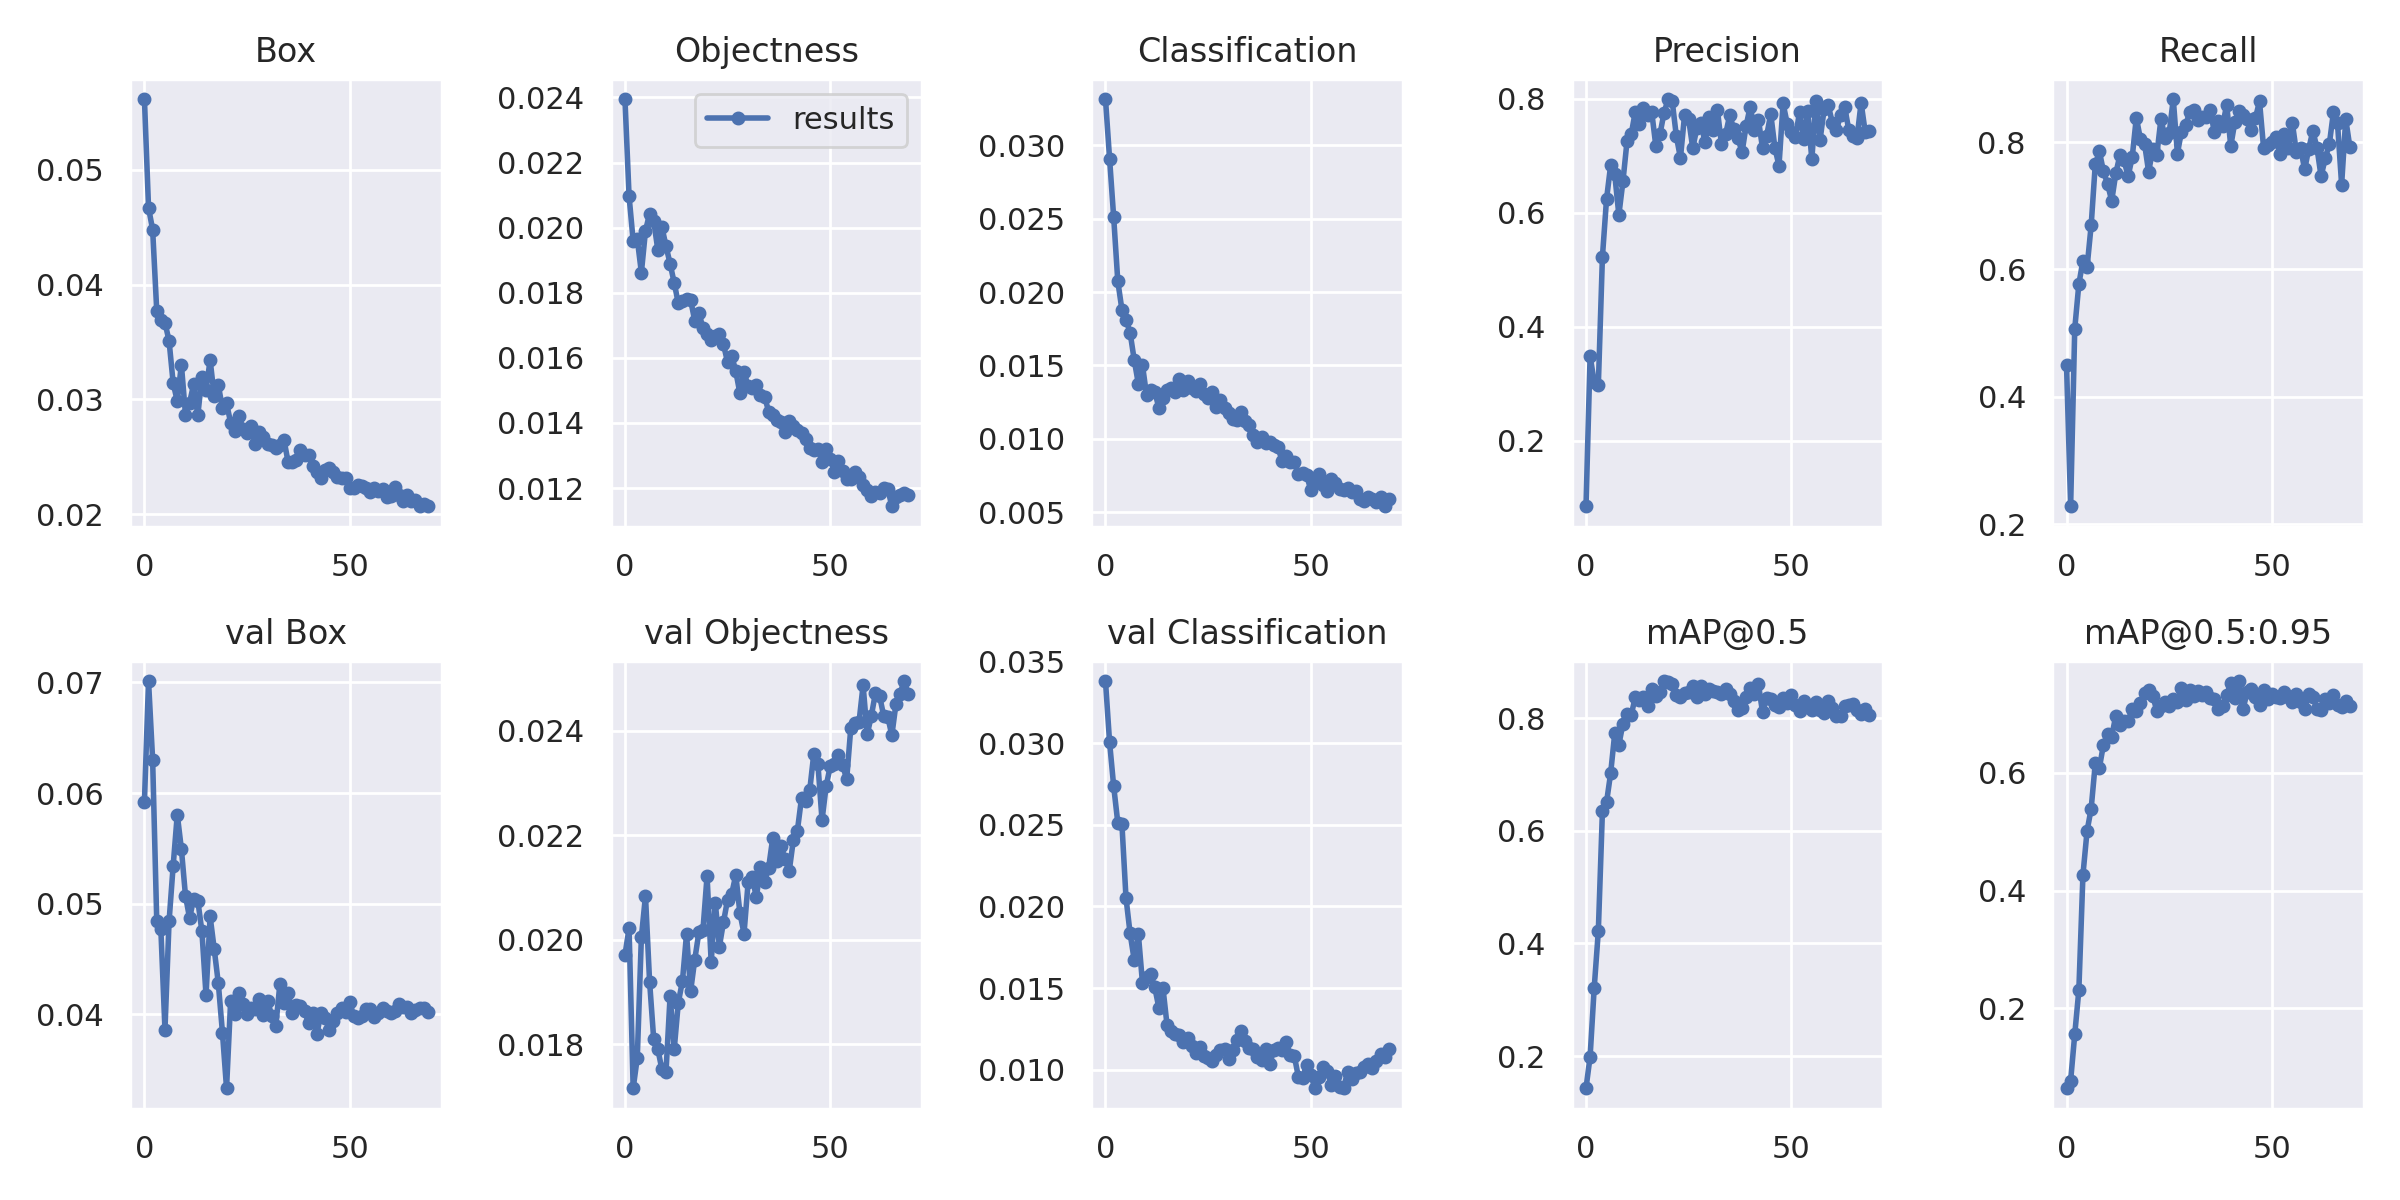

In [53]:
#lr 0.01 freeze 42
from IPython.display import Image, clear_output
Image(filename='runs/train/yolov7-traditional-cake34-v6-ok80/results.png', width=1000)  # view results

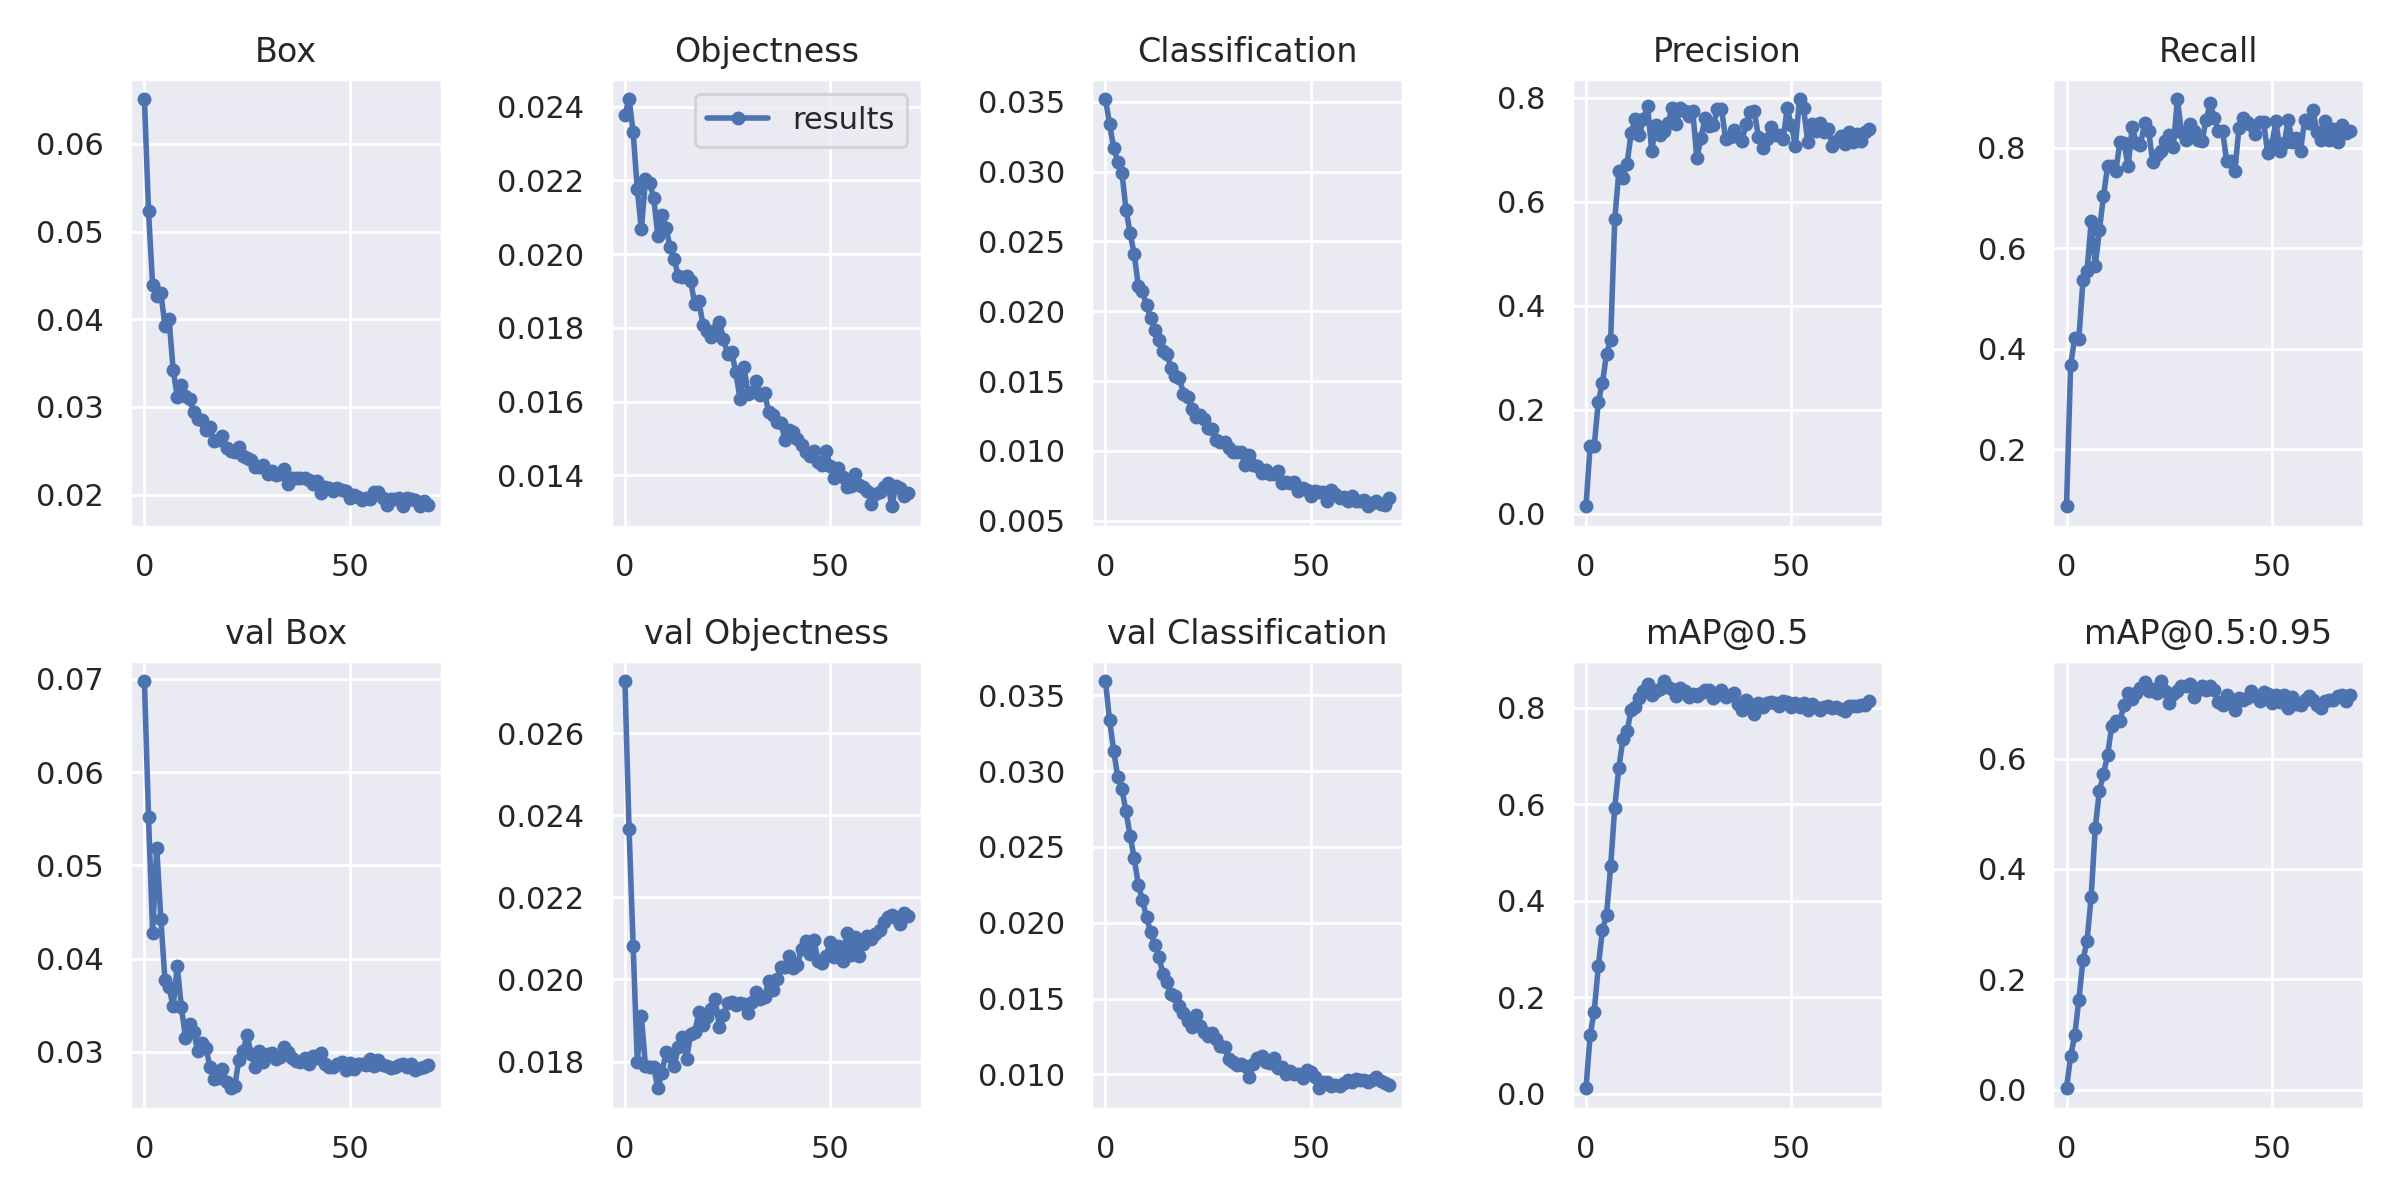

In [49]:
#lr 0.001 freeze 42
from IPython.display import Image, clear_output
Image(filename='runs/train/yolov7-traditional-cake35/results.png', width=1000)  # view results

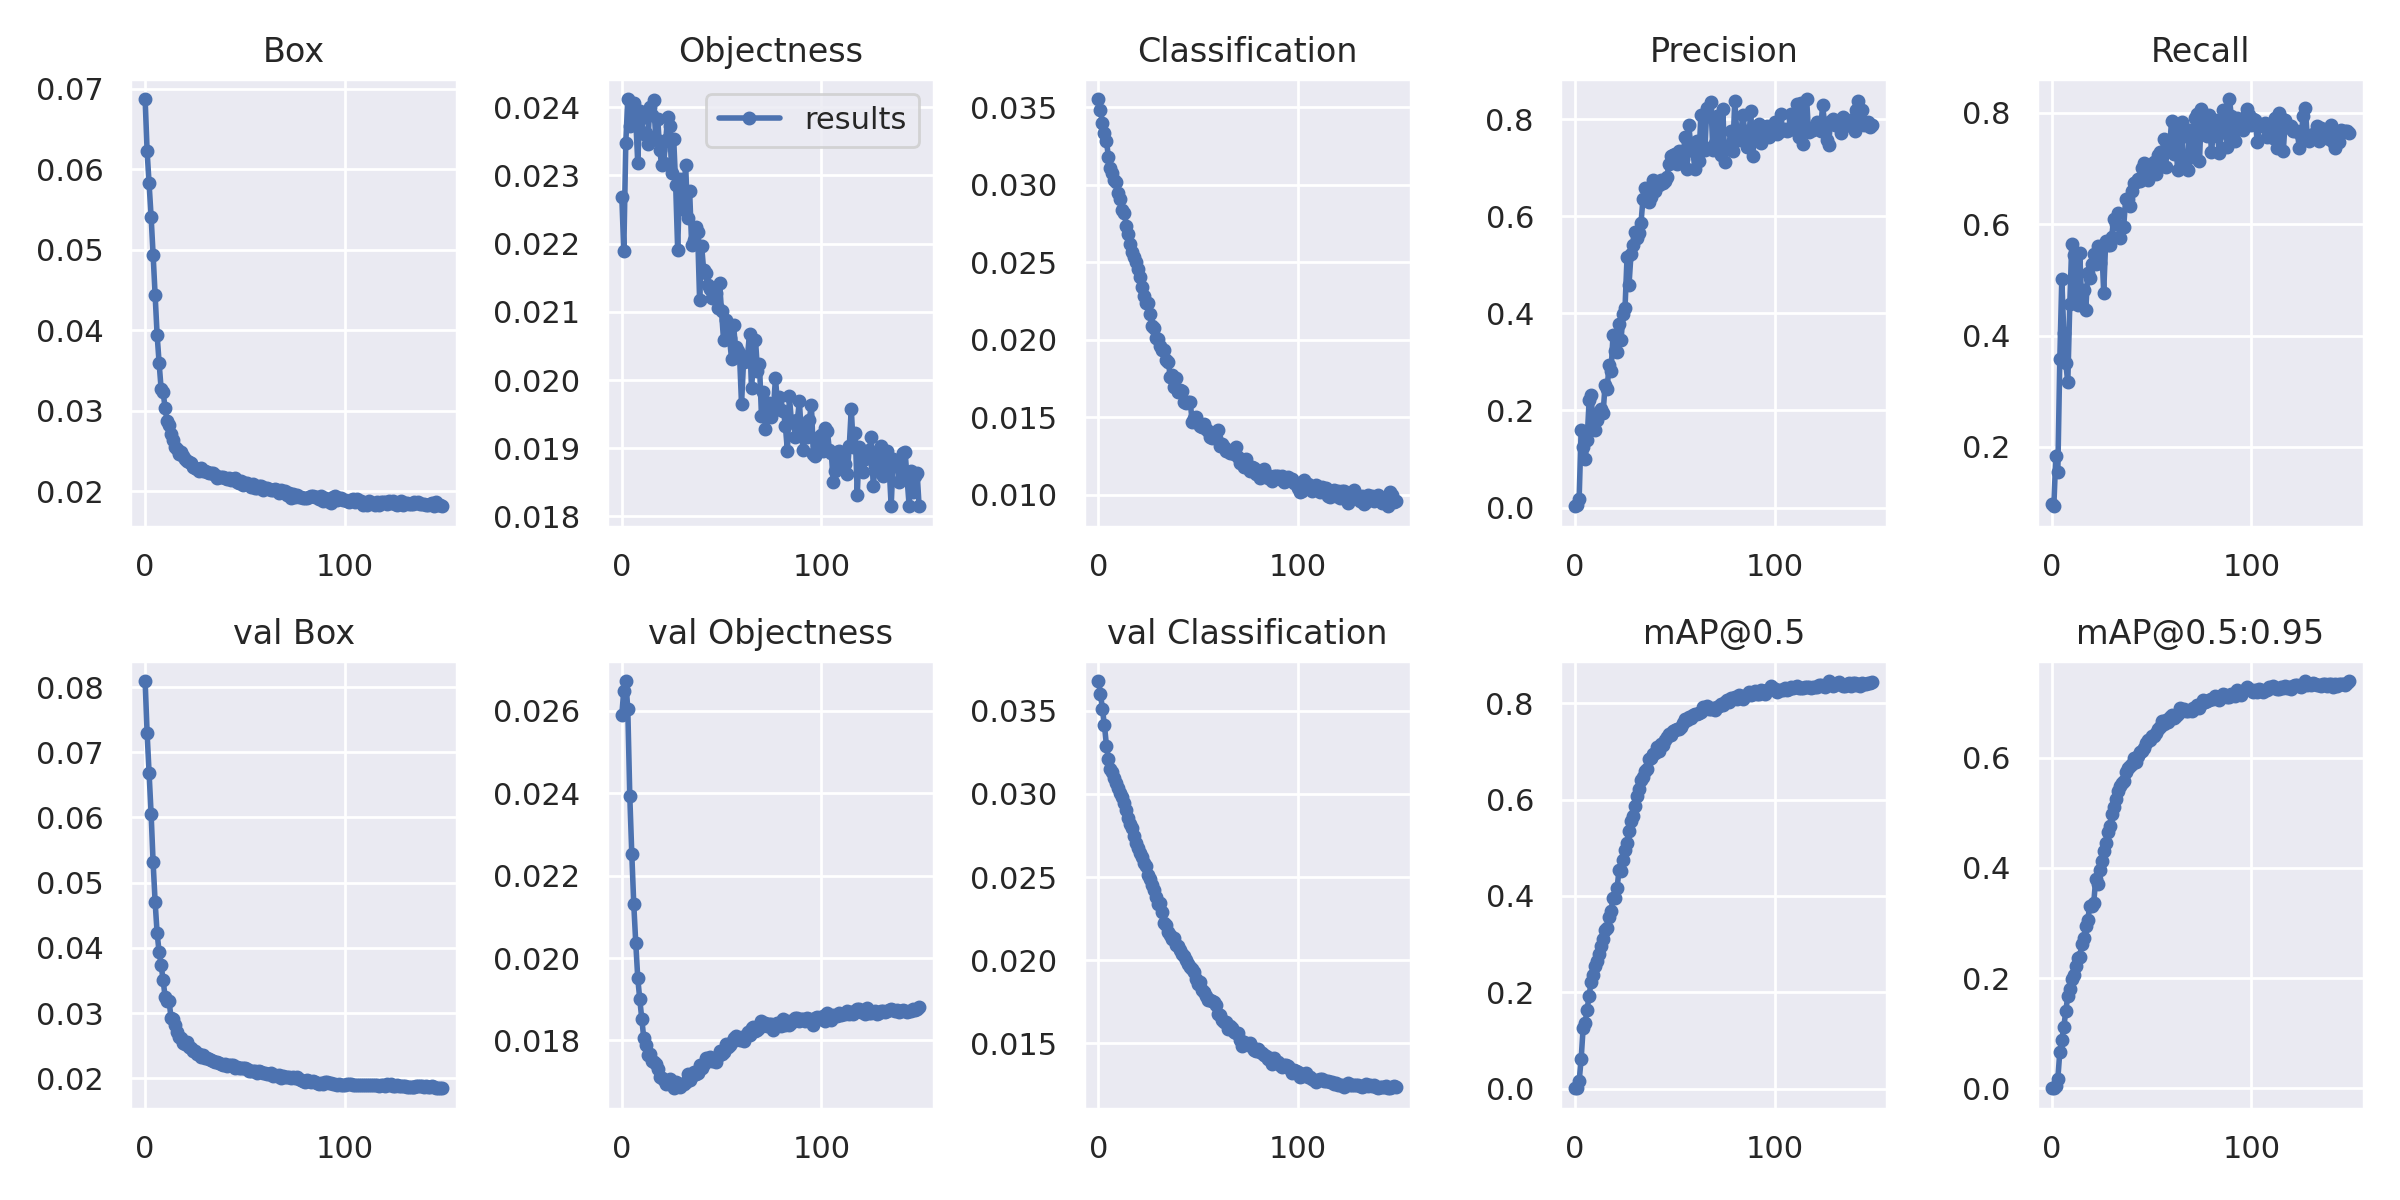

In [52]:
#lr 0.0001 freeze 42 epoch 150
from IPython.display import Image, clear_output
Image(filename='runs/train/yolov7-traditional-cake38/results.png', width=1000)  # view results

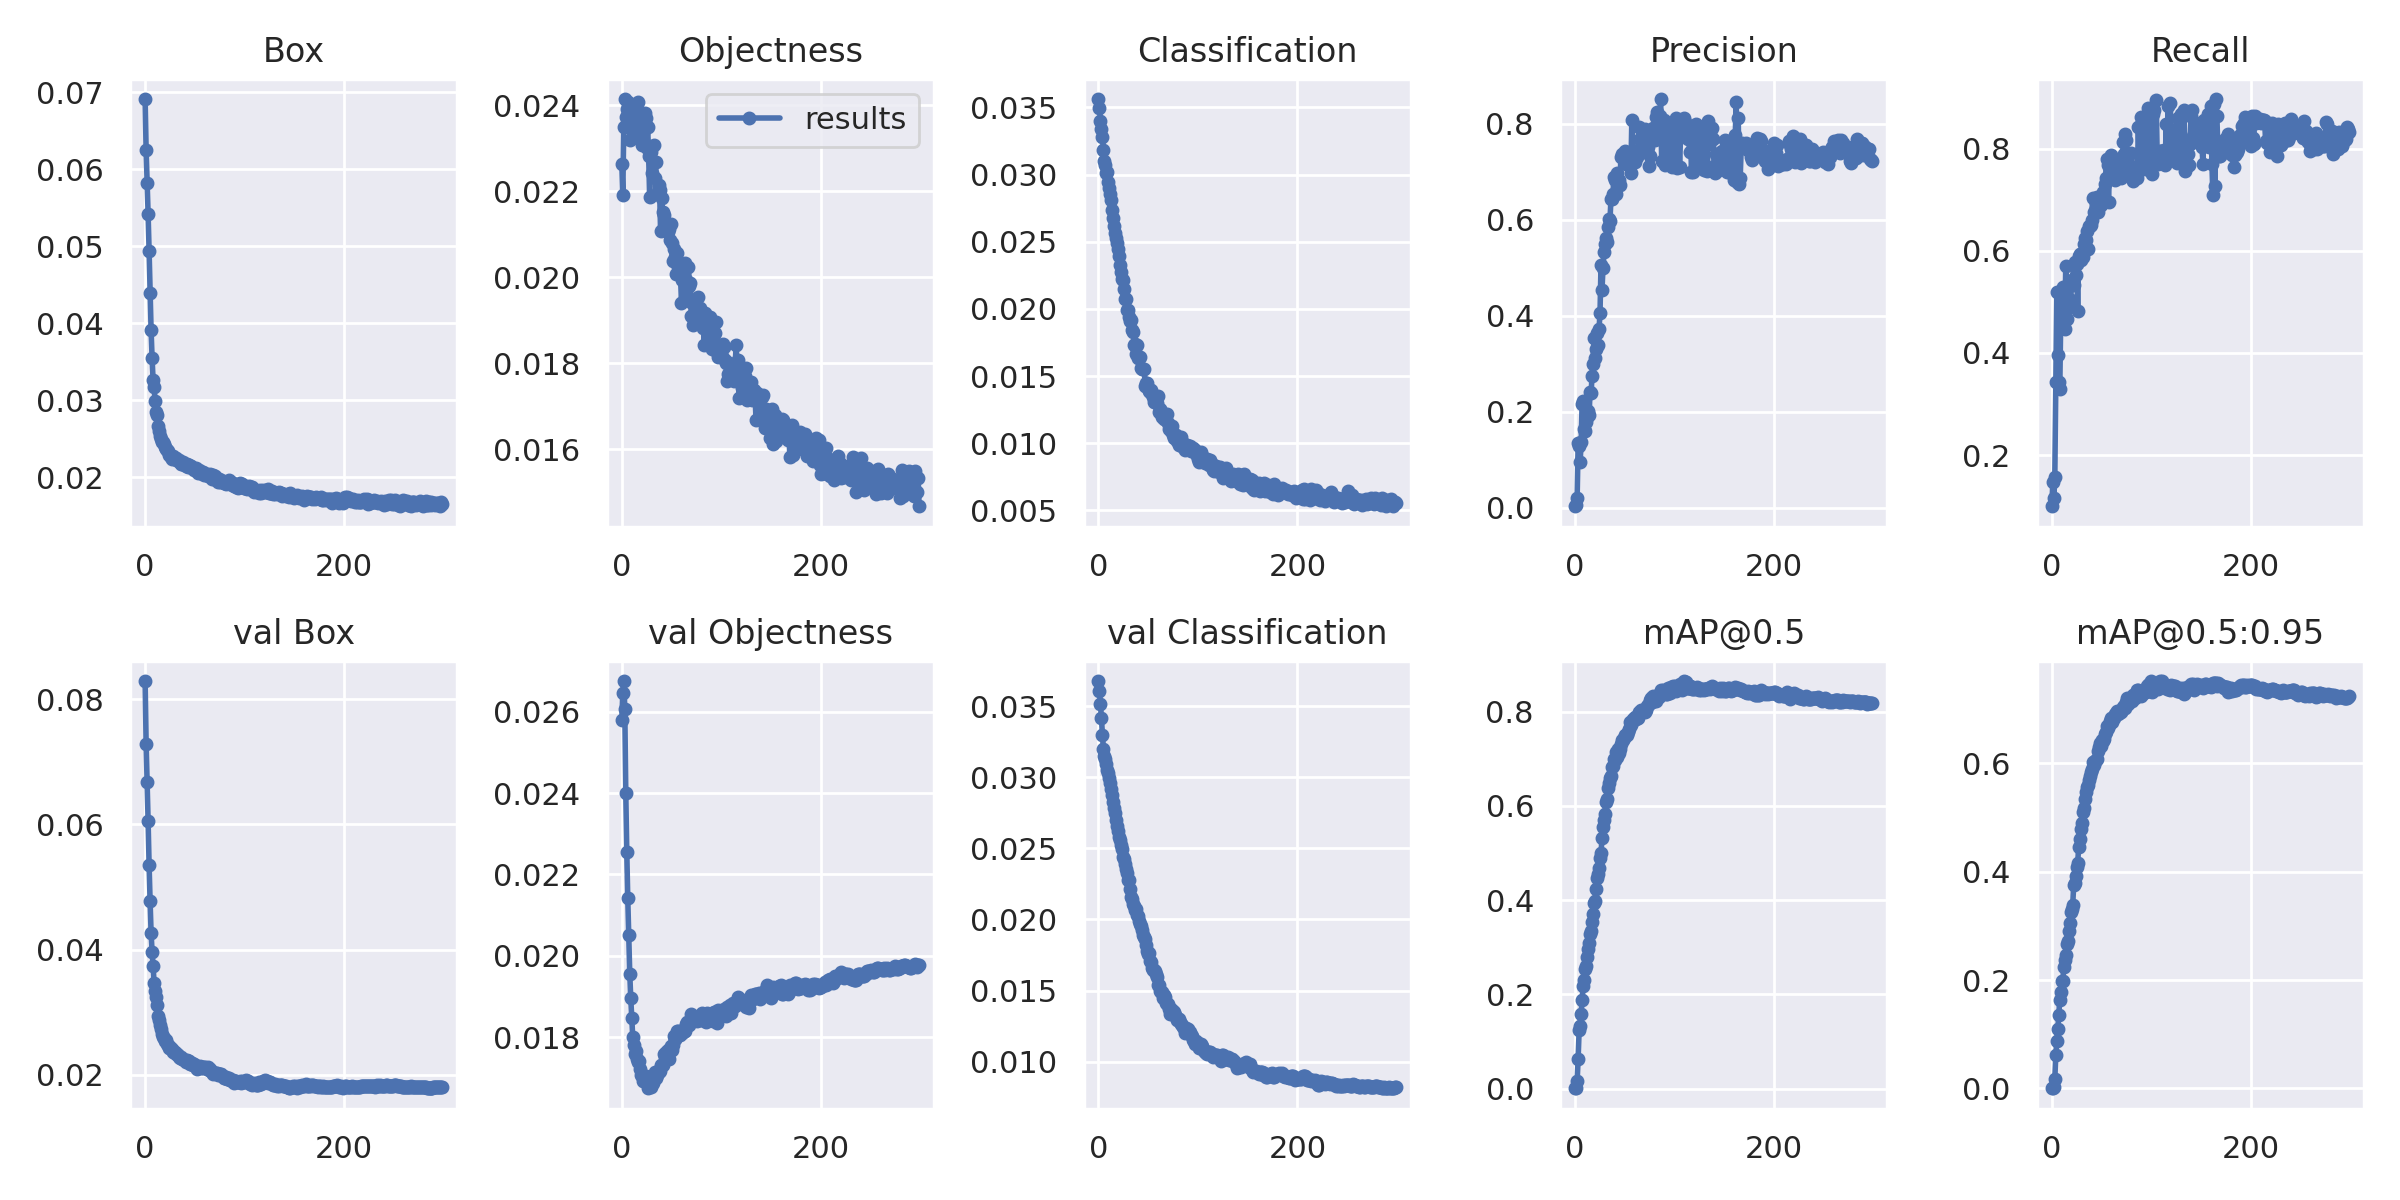

In [58]:
#lr 0.0001 freeze 42 epoch 300
from IPython.display import Image, clear_output
Image(filename='runs/train/yolov7-traditional-cake39/results.png', width=1000)  # view results

## Test your YOLOv7 custom model on the Traditional Cake test dataset

In [23]:
#lr 0.01 freeze 0 epoch 150
!python yolov7/test.py --data 'data-v2/data.yaml' --weights 'runs/train/yolov7-traditional-cake21-v4-ok/weights/best.pt' --img-size 640 --iou-thres 0.7 --task test

Namespace(weights=['runs/train/yolov7-traditional-cake21-v4-ok/weights/best.pt'], data='data-v2/data.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.7, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/isb/anaconda3/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36519530 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model t

In [22]:
#lr 0.01 freeze 50 epoch 70
!python yolov7/test.py --data 'data-v2/data.yaml' --weights 'runs/train/yolov7-traditional-cake29-v5-okk/weights/best.pt' --img-size 640 --iou-thres 0.7 --task test

Namespace(weights=['runs/train/yolov7-traditional-cake29-v5-okk/weights/best.pt'], data='data-v2/data.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.7, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/isb/anaconda3/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36519530 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model 

In [10]:
#lr 0.01 freeze 42 epoch 70
!python yolov7/test.py --data 'data-v2/data.yaml' --weights 'runs/train/yolov7-traditional-cake34-v6-ok80/weights/best.pt' --img-size 640 --iou-thres 0.7 --task test

Namespace(weights=['runs/train/yolov7-traditional-cake34/weights/best.pt'], data='data-v2/data.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.7, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/isb/anaconda3/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36519530 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model to Trac

In [47]:
#lr 0.001 freeze 42 
!python yolov7/test.py --data 'data-v2/data.yaml' --weights 'runs/train/yolov7-traditional-cake35/weights/best.pt' --img-size 640 --iou-thres 0.7 --task test

Namespace(weights=['runs/train/yolov7-traditional-cake35/weights/best.pt'], data='data-v2/data.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.7, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/isb/anaconda3/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36519530 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model to Trac

In [56]:
#lr 0.0001 freeze 42 epoch 150
!python yolov7/test.py --data 'data-v2/data.yaml' --weights 'runs/train/yolov7-traditional-cake38/weights/best.pt' --img-size 640 --iou-thres 0.7 --task test

Namespace(weights=['runs/train/yolov7-traditional-cake38/weights/best.pt'], data='data-v2/data.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.7, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/isb/anaconda3/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36519530 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model to Trac

In [57]:
#lr 0.0001 freeze 42 epoch 300
!python yolov7/test.py --data 'data-v2/data.yaml' --weights 'runs/train/yolov7-traditional-cake39/weights/best.pt' --img-size 640 --iou-thres 0.7 --task test

Namespace(weights=['runs/train/yolov7-traditional-cake39/weights/best.pt'], data='data-v2/data.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.7, task='test', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/isb/anaconda3/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36519530 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model to Trac

## Confusion Matrix - Testing of the Best Weight (Highest mAP)

#### Using the best weight : lr 0.01 freeze 42 epoch 70 -> MAP 80.4%

In [111]:
from utils import general

class ConfusionMatrix:
    # Updated version of https://github.com/kaanakan/object_detection_confusion_matrix
    def __init__(self, nc, conf=0.25, iou_thres=0.45):
        self.matrix = np.zeros((nc + 1, nc + 1))
        self.nc = nc  # number of classes
        self.conf = conf
        self.iou_thres = iou_thres

    def process_batch(self, detections, labels):
        """
        Return intersection-over-union (Jaccard index) of boxes.
        Both sets of boxes are expected to be in (x1, y1, x2, y2) format.
        Arguments:
            detections (Array[N, 6]), x1, y1, x2, y2, conf, class
            labels (Array[M, 5]), class, x1, y1, x2, y2
        Returns:
            None, updates confusion matrix accordingly
        """
        detections = detections[detections[:, 4] > self.conf]
        gt_classes = labels[:, 0].int()
        detection_classes = detections[:, 5].int()
        iou = general.box_iou(labels[:, 1:], detections[:, :4])

        x = torch.where(iou > self.iou_thres)
        if x[0].shape[0]:
            matches = torch.cat((torch.stack(x, 1), iou[x[0], x[1]][:, None]), 1).cpu().numpy()
            if x[0].shape[0] > 1:
                matches = matches[matches[:, 2].argsort()[::-1]]
                matches = matches[np.unique(matches[:, 1], return_index=True)[1]]
                matches = matches[matches[:, 2].argsort()[::-1]]
                matches = matches[np.unique(matches[:, 0], return_index=True)[1]]
        else:
            matches = np.zeros((0, 3))

        n = matches.shape[0] > 0
        m0, m1, _ = matches.transpose().astype(np.int16)
        for i, gc in enumerate(gt_classes):
            j = m0 == i
            if n and sum(j) == 1:
                self.matrix[gc, detection_classes[m1[j]]] += 1  # correct
            else:
                self.matrix[self.nc, gc] += 1  # background FP

        if n:
            for i, dc in enumerate(detection_classes):
                if not any(m1 == i):
                    self.matrix[dc, self.nc] += 1  # background FN

    def matrix(self):
        return self.matrix

    def plot(self, save_dir='', names=()):
        try:
            import seaborn as sn

            array = self.matrix 
            # / (self.matrix.sum(0).reshape(1, self.nc + 1) + 1E-6)  # normalize
            # array[array < 0.005] = np.nan  # don't annotate (would appear as 0.00)

            fig = plt.figure(figsize=(12, 9), tight_layout=True)
            sn.set(font_scale=1.0 if self.nc < 50 else 0.8)  # for label size
            labels = (0 < len(names) < 99) and len(names) == self.nc  # apply names to ticklabels
            sn.heatmap(array, annot=self.nc < 30, annot_kws={"size": 8}, cmap='Blues', fmt='.0f', square=True,
                       xticklabels=names + ['background FP'] if labels else "auto",
                       yticklabels=names + ['background FN'] if labels else "auto").set_facecolor((1, 1, 1))
            fig.axes[0].set_xlabel('True')
            fig.axes[0].set_ylabel('Predicted')
            fig.savefig(Path(save_dir) / 'confusion_matrix.png', dpi=250)
        except Exception as e:
            pass

    def print(self):
        for i in range(self.nc + 1):
            print(' '.join(map(str, self.matrix[i])))

In [112]:
import argparse
import json
import os
from pathlib import Path
from threading import Thread

import numpy as np
import torch
import yaml
from tqdm import tqdm

from models.experimental import attempt_load
from utils.datasets import create_dataloader
from utils.general import coco80_to_coco91_class, check_dataset, check_file, check_img_size, check_requirements, \
    box_iou, non_max_suppression, scale_coords, xyxy2xywh, xywh2xyxy, set_logging, increment_path, colorstr
from utils.metrics import ap_per_class
# , ConfusionMatrix
from utils.plots import plot_images, output_to_target, plot_study_txt
from utils.torch_utils import select_device, time_synchronized, TracedModel

def test(data,
         weights=None,
         batch_size=32,
         imgsz=640,
         conf_thres=0.001,
         iou_thres=0.6,  # for NMS
         save_json=False,
         single_cls=False,
         augment=False,
         verbose=False,
         model=None,
         dataloader=None,
         save_dir=Path(''),  # for saving images
         save_txt=False,  # for auto-labelling
         save_hybrid=False,  # for hybrid auto-labelling
         save_conf=False,  # save auto-label confidences
         plots=True,
         wandb_logger=None,
         compute_loss=None,
         half_precision=True,
         trace=False,
         is_coco=False,
         v5_metric=False):
    # Initialize/load model and set device
    training = model is not None
    if training:  # called by train.py
        device = next(model.parameters()).device  # get model device

    else:  # called directly
        set_logging()
        device = select_device(opt.device, batch_size=batch_size)

        # Directories
        save_dir = Path(increment_path(Path(opt.project) / opt.name, exist_ok=opt.exist_ok))  # increment run
        (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

        # Load model
        model = attempt_load(weights, map_location=device)  # load FP32 model
        gs = max(int(model.stride.max()), 32)  # grid size (max stride)
        imgsz = check_img_size(imgsz, s=gs)  # check img_size
        
        if trace:
            model = TracedModel(model, device, imgsz)

    # Half
    half = device.type != 'cpu' and half_precision  # half precision only supported on CUDA
    if half:
        model.half()

    # Configure
    model.eval()
    if isinstance(data, str):
        is_coco = data.endswith('coco.yaml')
        with open(data) as f:
            data = yaml.load(f, Loader=yaml.SafeLoader)
    check_dataset(data)  # check
    nc = 1 if single_cls else int(data['nc'])  # number of classes
    iouv = torch.linspace(0.5, 0.95, 10).to(device)  # iou vector for mAP@0.5:0.95
    niou = iouv.numel()

    # Logging
    log_imgs = 0
    if wandb_logger and wandb_logger.wandb:
        log_imgs = min(wandb_logger.log_imgs, 100)
    # Dataloader
    if not training:
        if device.type != 'cpu':
            model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))  # run once
        task = opt.task if opt.task in ('train', 'val', 'test') else 'val'  # path to train/val/test images
        dataloader = create_dataloader(data[task], imgsz, batch_size, gs, opt, pad=0.5, rect=True,
                                       prefix=colorstr(f'{task}: '))[0]

    if v5_metric:
        print("Testing with YOLOv5 AP metric...")
    
    seen = 0
    confusion_matrix = ConfusionMatrix(nc=nc)
    names = {k: v for k, v in enumerate(model.names if hasattr(model, 'names') else model.module.names)}
    coco91class = coco80_to_coco91_class()
    s = ('%20s' + '%12s' * 6) % ('Class', 'Images', 'Labels', 'P', 'R', 'mAP@.5', 'mAP@.5:.95')
    p, r, f1, mp, mr, map50, map, t0, t1 = 0., 0., 0., 0., 0., 0., 0., 0., 0.
    loss = torch.zeros(3, device=device)
    jdict, stats, ap, ap_class, wandb_images = [], [], [], [], []
    for batch_i, (img, targets, paths, shapes) in enumerate(tqdm(dataloader, desc=s)):
        img = img.to(device, non_blocking=True)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        targets = targets.to(device)
        nb, _, height, width = img.shape  # batch size, channels, height, width

        with torch.no_grad():
            # Run model
            t = time_synchronized()
            out, train_out = model(img, augment=augment)  # inference and training outputs
            t0 += time_synchronized() - t

            # Compute loss
            if compute_loss:
                loss += compute_loss([x.float() for x in train_out], targets)[1][:3]  # box, obj, cls

            # Run NMS
            targets[:, 2:] *= torch.Tensor([width, height, width, height]).to(device)  # to pixels
            lb = [targets[targets[:, 0] == i, 1:] for i in range(nb)] if save_hybrid else []  # for autolabelling
            t = time_synchronized()
            out = non_max_suppression(out, conf_thres=conf_thres, iou_thres=iou_thres, labels=lb, multi_label=True)
            t1 += time_synchronized() - t

        # Statistics per image
        for si, pred in enumerate(out):
            labels = targets[targets[:, 0] == si, 1:]
            nl = len(labels)
            tcls = labels[:, 0].tolist() if nl else []  # target class
            path = Path(paths[si])
            seen += 1

            if len(pred) == 0:
                if nl:
                    stats.append((torch.zeros(0, niou, dtype=torch.bool), torch.Tensor(), torch.Tensor(), tcls))
                continue

            # Predictions
            predn = pred.clone()
            scale_coords(img[si].shape[1:], predn[:, :4], shapes[si][0], shapes[si][1])  # native-space pred

            # Append to text file
            if save_txt:
                gn = torch.tensor(shapes[si][0])[[1, 0, 1, 0]]  # normalization gain whwh
                for *xyxy, conf, cls in predn.tolist():
                    xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                    line = (cls, *xywh, conf) if save_conf else (cls, *xywh)  # label format
                    with open(save_dir / 'labels' / (path.stem + '.txt'), 'a') as f:
                        f.write(('%g ' * len(line)).rstrip() % line + '\n')

            # W&B logging - Media Panel Plots
            if len(wandb_images) < log_imgs and wandb_logger.current_epoch > 0:  # Check for test operation
                if wandb_logger.current_epoch % wandb_logger.bbox_interval == 0:
                    box_data = [{"position": {"minX": xyxy[0], "minY": xyxy[1], "maxX": xyxy[2], "maxY": xyxy[3]},
                                 "class_id": int(cls),
                                 "box_caption": "%s %.3f" % (names[cls], conf),
                                 "scores": {"class_score": conf},
                                 "domain": "pixel"} for *xyxy, conf, cls in pred.tolist()]
                    boxes = {"predictions": {"box_data": box_data, "class_labels": names}}  # inference-space
                    wandb_images.append(wandb_logger.wandb.Image(img[si], boxes=boxes, caption=path.name))
            wandb_logger.log_training_progress(predn, path, names) if wandb_logger and wandb_logger.wandb_run else None

            # Append to pycocotools JSON dictionary
            if save_json:
                # [{"image_id": 42, "category_id": 18, "bbox": [258.15, 41.29, 348.26, 243.78], "score": 0.236}, ...
                image_id = int(path.stem) if path.stem.isnumeric() else path.stem
                box = xyxy2xywh(predn[:, :4])  # xywh
                box[:, :2] -= box[:, 2:] / 2  # xy center to top-left corner
                for p, b in zip(pred.tolist(), box.tolist()):
                    jdict.append({'image_id': image_id,
                                  'category_id': coco91class[int(p[5])] if is_coco else int(p[5]),
                                  'bbox': [round(x, 3) for x in b],
                                  'score': round(p[4], 5)})

            # Assign all predictions as incorrect
            correct = torch.zeros(pred.shape[0], niou, dtype=torch.bool, device=device)
            if nl:
                detected = []  # target indices
                tcls_tensor = labels[:, 0]

                # target boxes
                tbox = xywh2xyxy(labels[:, 1:5])
                scale_coords(img[si].shape[1:], tbox, shapes[si][0], shapes[si][1])  # native-space labels
                if plots:
                    confusion_matrix.process_batch(predn, torch.cat((labels[:, 0:1], tbox), 1))

                # Per target class
                for cls in torch.unique(tcls_tensor):
                    ti = (cls == tcls_tensor).nonzero(as_tuple=False).view(-1)  # prediction indices
                    pi = (cls == pred[:, 5]).nonzero(as_tuple=False).view(-1)  # target indices

                    # Search for detections
                    if pi.shape[0]:
                        # Prediction to target ious
                        ious, i = box_iou(predn[pi, :4], tbox[ti]).max(1)  # best ious, indices

                        # Append detections
                        detected_set = set()
                        for j in (ious > iouv[0]).nonzero(as_tuple=False):
                            d = ti[i[j]]  # detected target
                            if d.item() not in detected_set:
                                detected_set.add(d.item())
                                detected.append(d)
                                correct[pi[j]] = ious[j] > iouv  # iou_thres is 1xn
                                if len(detected) == nl:  # all targets already located in image
                                    break

            # Append statistics (correct, conf, pcls, tcls)
            stats.append((correct.cpu(), pred[:, 4].cpu(), pred[:, 5].cpu(), tcls))

        # Plot images
        if plots and batch_i < 3:
            f = save_dir / f'test_batch{batch_i}_labels.jpg'  # labels
            Thread(target=plot_images, args=(img, targets, paths, f, names), daemon=True).start()
            f = save_dir / f'test_batch{batch_i}_pred.jpg'  # predictions
            Thread(target=plot_images, args=(img, output_to_target(out), paths, f, names), daemon=True).start()

    # Compute statistics
    stats = [np.concatenate(x, 0) for x in zip(*stats)]  # to numpy
    if len(stats) and stats[0].any():
        p, r, ap, f1, ap_class = ap_per_class(*stats, plot=plots, v5_metric=v5_metric, save_dir=save_dir, names=names)
        ap50, ap = ap[:, 0], ap.mean(1)  # AP@0.5, AP@0.5:0.95
        mp, mr, map50, map = p.mean(), r.mean(), ap50.mean(), ap.mean()
        nt = np.bincount(stats[3].astype(np.int64), minlength=nc)  # number of targets per class
    else:
        nt = torch.zeros(1)

    # Print results
    pf = '%20s' + '%12i' * 2 + '%12.3g' * 4  # print format
    print(pf % ('all', seen, nt.sum(), mp, mr, map50, map))

    # Print results per class
    if (verbose or (nc < 50 and not training)) and nc > 1 and len(stats):
        for i, c in enumerate(ap_class):
            print(pf % (names[c], seen, nt[c], p[i], r[i], ap50[i], ap[i]))

    # Print speeds
    t = tuple(x / seen * 1E3 for x in (t0, t1, t0 + t1)) + (imgsz, imgsz, batch_size)  # tuple
    if not training:
        print('Speed: %.1f/%.1f/%.1f ms inference/NMS/total per %gx%g image at batch-size %g' % t)

    # Plots
    if plots:
        confusion_matrix.plot(save_dir=save_dir, names=list(names.values()))
        if wandb_logger and wandb_logger.wandb:
            val_batches = [wandb_logger.wandb.Image(str(f), caption=f.name) for f in sorted(save_dir.glob('test*.jpg'))]
            wandb_logger.log({"Validation": val_batches})
    if wandb_images:
        wandb_logger.log({"Bounding Box Debugger/Images": wandb_images})

    # Save JSON
    if save_json and len(jdict):
        w = Path(weights[0] if isinstance(weights, list) else weights).stem if weights is not None else ''  # weights
        anno_json = './coco/annotations/instances_val2017.json'  # annotations json
        pred_json = str(save_dir / f"{w}_predictions.json")  # predictions json
        print('\nEvaluating pycocotools mAP... saving %s...' % pred_json)
        with open(pred_json, 'w') as f:
            json.dump(jdict, f)

        try:  # https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoEvalDemo.ipynb
            from pycocotools.coco import COCO
            from pycocotools.cocoeval import COCOeval

            anno = COCO(anno_json)  # init annotations api
            pred = anno.loadRes(pred_json)  # init predictions api
            eval = COCOeval(anno, pred, 'bbox')
            if is_coco:
                eval.params.imgIds = [int(Path(x).stem) for x in dataloader.dataset.img_files]  # image IDs to evaluate
            eval.evaluate()
            eval.accumulate()
            eval.summarize()
            map, map50 = eval.stats[:2]  # update results (mAP@0.5:0.95, mAP@0.5)
        except Exception as e:
            print(f'pycocotools unable to run: {e}')

    # Return results
    model.float()  # for training
    if not training:
        s = f"\n{len(list(save_dir.glob('labels/*.txt')))} labels saved to {save_dir / 'labels'}" if save_txt else ''
        print(f"Results saved to {save_dir}{s}")
    maps = np.zeros(nc) + map
    for i, c in enumerate(ap_class):
        maps[c] = ap[i]
    return (mp, mr, map50, map, *(loss.cpu() / len(dataloader)).tolist()), maps, t

In [100]:
var = 0

YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)



Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


Model Summary: 314 layers, 36519530 parameters, 6194944 gradients, 103.3 GFLOPS


 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



test: Scanning '../Felicia 20/data-v2/test/labels.cache' images and labels... 16
               Class      Images      Labels           P           R      mAP@.5


                 all         160         648       0.776       0.765       0.804       0.692
               cenil         160          34       0.764       0.765       0.779       0.586
               cucur         160          55       0.853       0.736       0.826       0.712
        dadar-gulung         160         122       0.905       0.869       0.905       0.815
        getuk-lindri         160          74       0.589        0.64       0.672       0.532
              lumpur         160          93       0.798       0.935       0.921       0.872
         putri-salju         160         100       0.716         0.5       0.587       0.477
              serabi         160          83       0.706       0.855       0.858       0.788
               wajik         160          87       0.877       0.822       0.883       0.757
Speed: 9.6/0.6/10.2 ms inference/NMS/total per 640x640 image at batch-size 32
Results saved to runs/train/yolov7-traditional-cake34-v6-ok80/test/test8


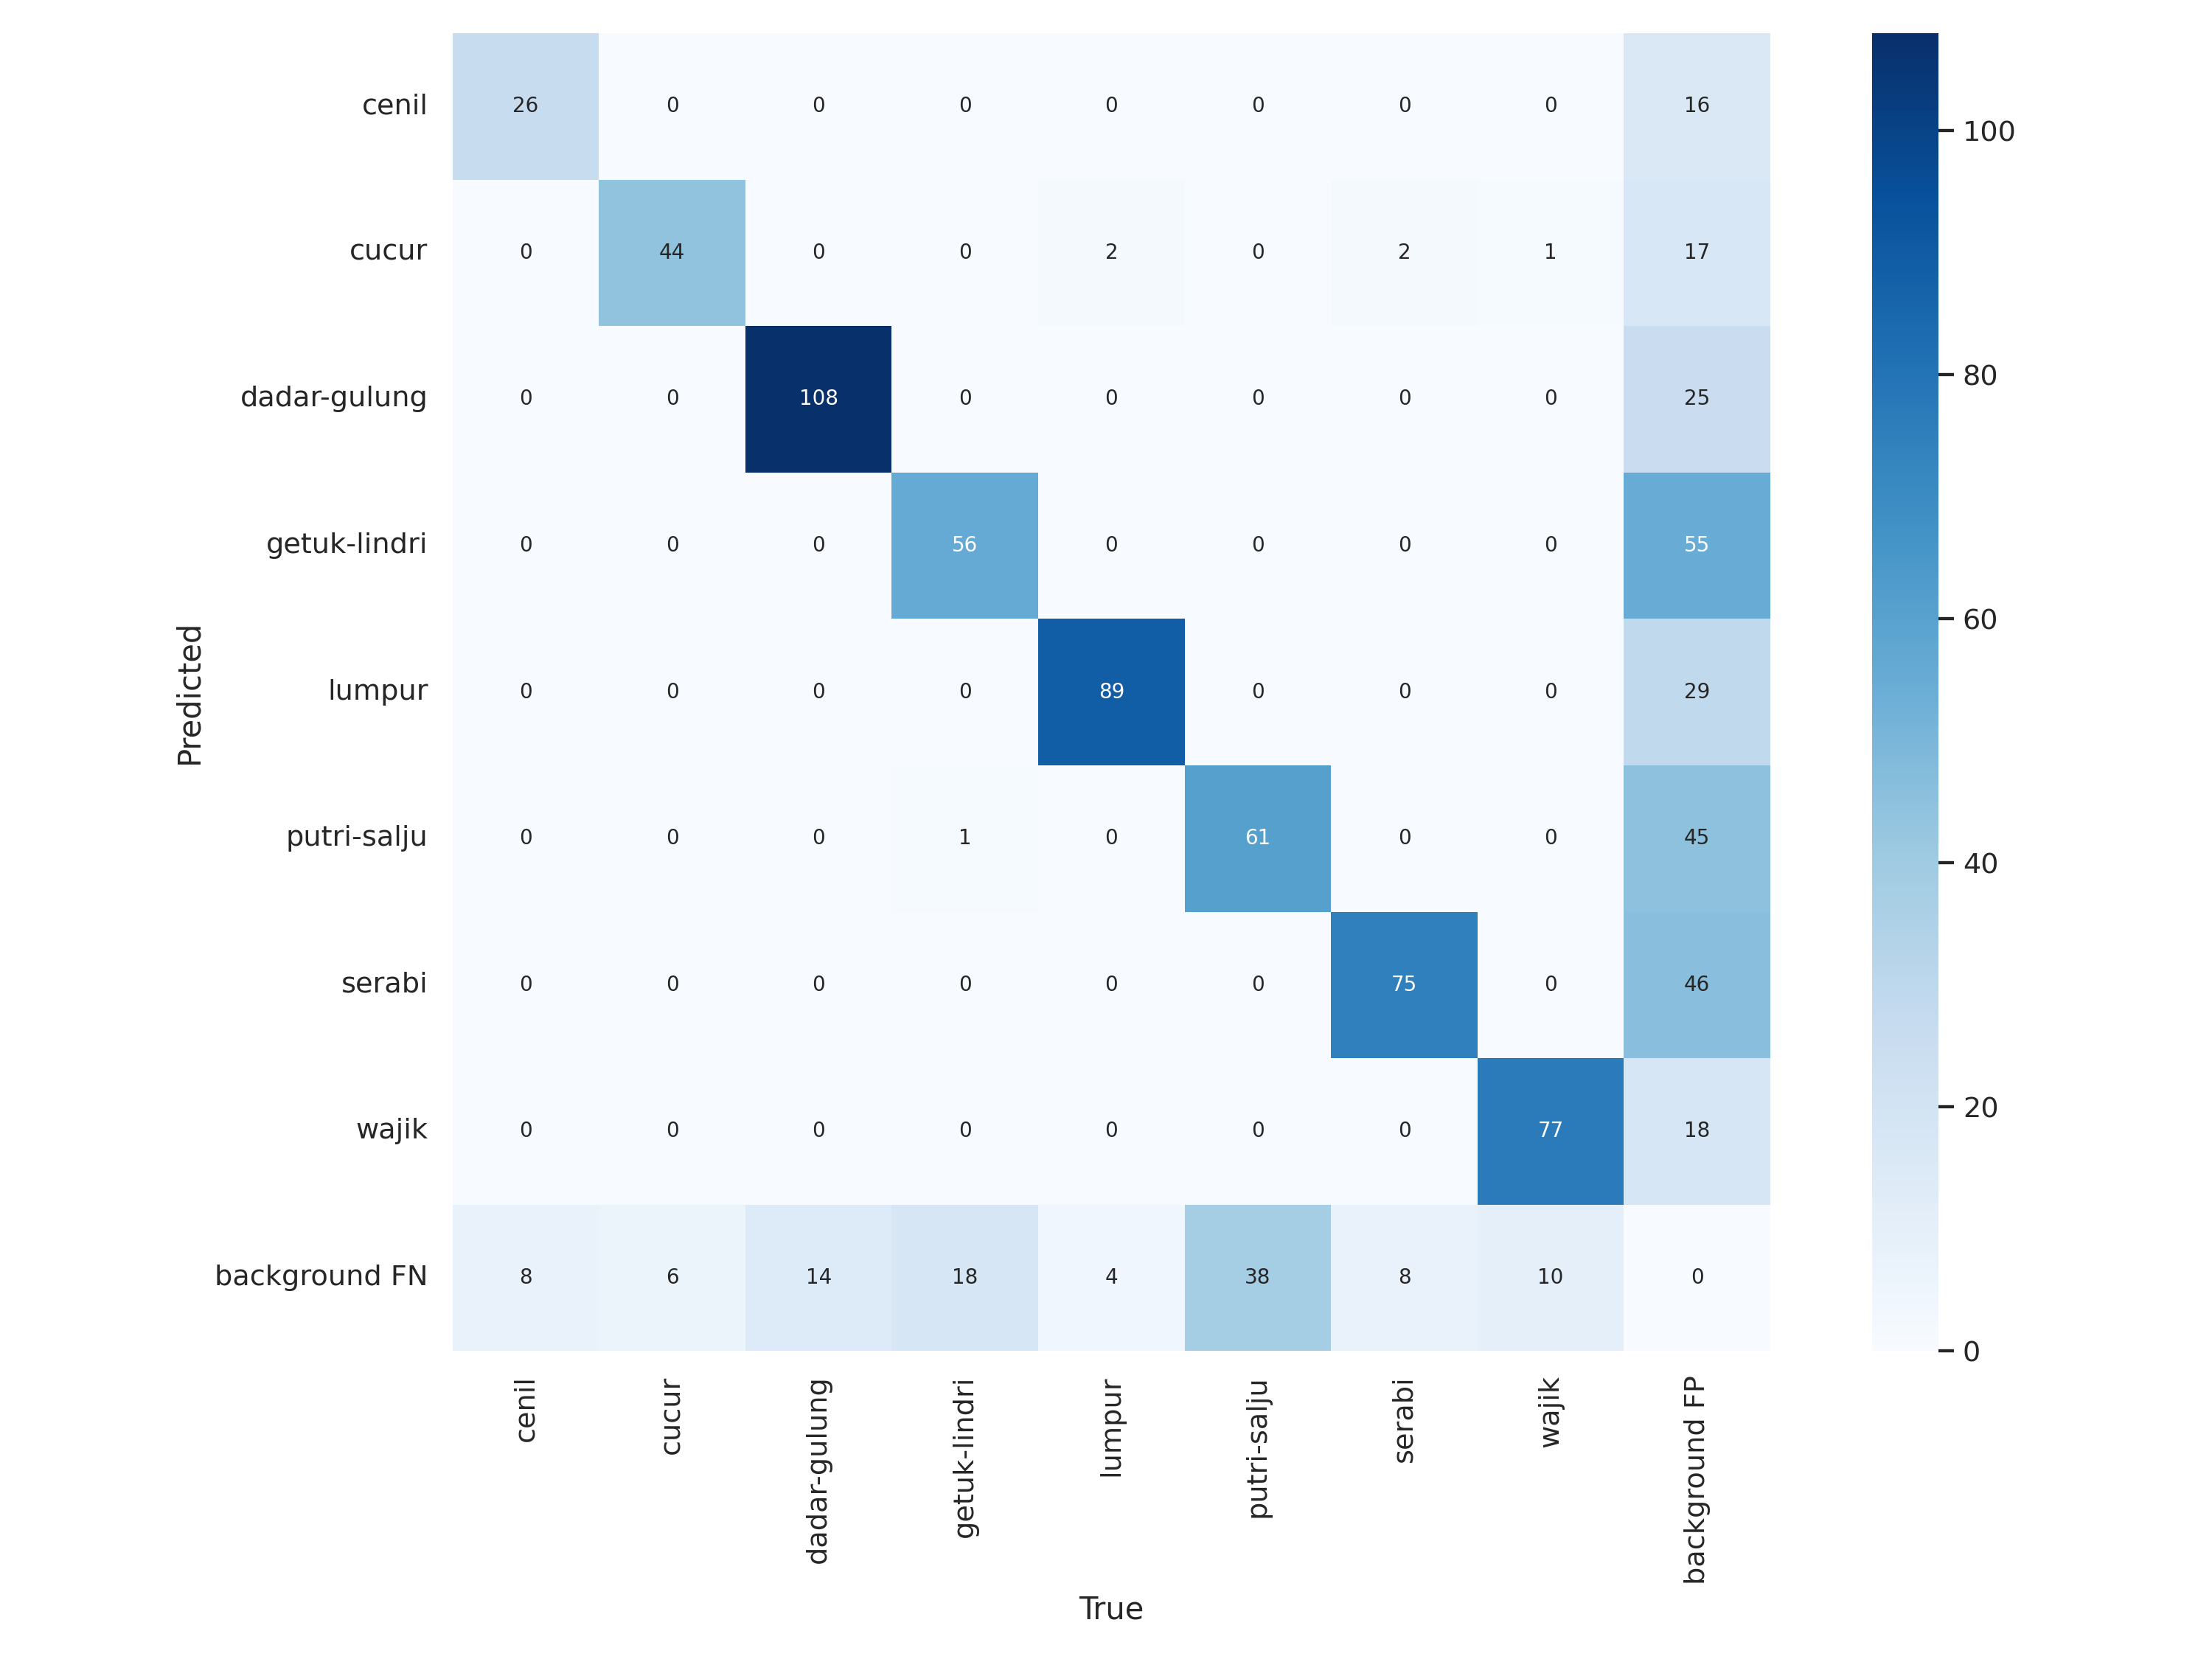

In [113]:
var += 1
name = 'test' + str(var)

class Options:
    def __init__(self):
        self.weights = 'runs/train/yolov7-traditional-cake34-v6-ok80/weights/yolov7.pt'  # Path to weights file
        self.data = 'data-v2/data.yaml'  # Path to data configuration file
        self.img_size = 640
        self.batch_size = 32
        self.conf_thres = 0.001
        self.iou_thres = 0.7
        self.device = ''  # Device: '' for CPU, '0' for GPU 0, etc.
        self.single_cls = False
        self.save_json = False
        self.augment = False
        self.cache_images = False
        self.workers = 8
        self.task = 'test'  # Task: 'train', 'val', or 'test'
        self.half = False
        self.epochs = 1
        self.verbose = False
        self.project = 'runs/train/yolov7-traditional-cake34-v6-ok80/test'
        self.name = name
        self.exist_ok = False

opt = Options()

test(opt.data,
             opt.weights,
             opt.batch_size,
             opt.img_size,
             opt.conf_thres,
             opt.iou_thres,
             opt.save_json,
             opt.single_cls,
             opt.augment,
             opt.verbose,
             save_txt=False,
             save_hybrid=False,
             save_conf=False,
             trace=not False,
             v5_metric=False
             )

# from IPython.display import Image, clear_output
Image(filename='runs/train/yolov7-traditional-cake34-v6-ok80/test/{}/confusion_matrix.png'.format(name), width=1000)

## Run YOLOv7 inference on new images

In [25]:
!python yolov7/detect.py --weights 'runs/train/yolov7-traditional-cake34-v6-ok80/weights/yolov7.pt' --conf 0.60 --img-size 640 --source 'images' --name yolov7-traditionalcake-detect

Namespace(weights=['runs/train/yolov7-traditional-cake34-v6-ok80/weights/yolov7.pt'], source='images', img_size=640, conf_thres=0.6, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='yolov7-traditionalcake-detect', exist_ok=False, no_trace=False)
YOLOR 🚀 2024-4-23 torch 2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036.25MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/isb/anaconda3/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36519530 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model to Traced-model

## Export trained weights for future inference

In [18]:
import os
%cd runs/train/yolov7-traditional-cake34-v6-ok80/weights
os.rename("best.pt","yolov7.pt")

/home/isb/Felicia 20/runs/train/yolov7-traditional-cake34-v6-ok80/weights


In [43]:
%cp runs/train/yolov7-traditional-cake34-v6-ok80/weights/yolov7.pt traditional-cake-model/yolov7-v4.pt